# US Census dataset analysis

## Getting started
We will use [Pandas](https://pandas.pydata.org/) for this analysis and data handling. We use [scikit-learn](http://scikit-learn.org/stable/) for creating models.

In [1]:
import pandas as pd
pd.options.display.max_columns = 50

%matplotlib inline
import matplotlib

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz

Let's import the data and link the columns to their names

In [2]:
headers = []
headers_file = open("us_census_full/census_income_metadata.txt")
for i, line in enumerate(headers_file):
    # Select the lines for the column names
    if i >= 142and i<= 184 and i!=166:
        headers.append(line.split(':')[0])
headers_file.close()
headers.append("income")

data = pd.read_csv('us_census_full/census_income_learn.csv', names=headers)
test = pd.read_csv('us_census_full/census_income_test.csv', names=headers)

## First look at the data

In [3]:
print(data.shape)
data.head(5)

(199523, 42)


age                  class of worker  detailed industry recode  \
0   73                  Not in universe                         0   
1   58   Self-employed-not incorporated                         4   
2   18                  Not in universe                         0   
3    9                  Not in universe                         0   
4   10                  Not in universe                         0   

   detailed occupation recode                    education  wage per hour  \
0                           0         High school graduate              0   
1                          34   Some college but no degree              0   
2                           0                   10th grade              0   
3                           0                     Children              0   
4                           0                     Children              0   

  enroll in edu inst last wk    marital stat           major industry code  \
0            Not in universe         Widowed   Not in universe or children   
1            Not in universe        Divorced                  Construction   
2                High school   Never married   Not in universe or children   
3            Not in universe   Never married   Not in universe or children   
4            Not in universe   Never married   Not in universe or children   

                  major occupation code                        race  \
0                       Not in universe                       White   
1   Precision production craft & repair                       White   
2                       Not in universe   Asian or Pacific Islander   
3                       Not in universe                       White   
4                       Not in universe                       White   

  hispanic origin      sex member of a labor union reason for unemployment  \
0       All other   Female         Not in universe         Not in universe   
1       All other     Male         Not in universe         Not in universe   
2       All other   Female         Not in universe         Not in universe   
3       All other   Female         Not in universe         Not in universe   
4       All other   Female         Not in universe         Not in universe   

  full or part time employment stat  capital gains  capital losses  \
0                Not in labor force              0               0   
1          Children or Armed Forces              0               0   
2                Not in labor force              0               0   
3          Children or Armed Forces              0               0   
4          Children or Armed Forces              0               0   

   dividends from stocks      tax filer stat region of previous residence  \
0                      0            Nonfiler              Not in universe   
1                      0   Head of household                        South   
2                      0            Nonfiler              Not in universe   
3                      0            Nonfiler              Not in universe   
4                      0            Nonfiler              Not in universe   

  state of previous residence         detailed household and family stat  \
0             Not in universe   Other Rel 18+ ever marr not in subfamily   
1                    Arkansas                                Householder   
2             Not in universe    Child 18+ never marr Not in a subfamily   
3             Not in universe      Child <18 never marr not in subfamily   
4             Not in universe      Child <18 never marr not in subfamily   

  detailed household summary in household  instance weight  \
0           Other relative of householder          1700.09   
1                             Householder          1053.55   
2                       Child 18 or older           991.95   
3            Child under 18 never married          1758.14   
4            Child under 18 never married          1069.16   

  migration code-change in msa migration code-

Let's have a look at the variable we want to predict (whether a person is earning more than 50k a year)

 - 50000.    0.937942
 50000+.     0.062058
Name: income, dtype: float64


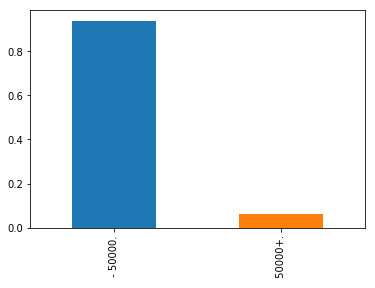

In [4]:
income_ratio = data.set_index(["income"]).index.value_counts(normalize=True)
print(income_ratio)
below, above = data["income"].unique()
plt = income_ratio.plot.bar()

The dataset is close to 200000 entries, most of them (93,8%) being people earning less than 50k.

---
# Data Analysis
Let's study and analyse some variables that could be correlated to the income, such as education, class of worker, industry, occupation. Race, sex, age could also be interesting variables to analyse.

## Race / Sex

 White                          0.838826
 Black                          0.102319
 Asian or Pacific Islander      0.029245
 Other                          0.018329
 Amer Indian Aleut or Eskimo    0.011282
Name: race, dtype: float64


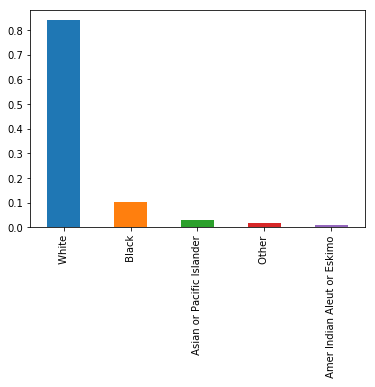

In [5]:
race_counts = data["race"].value_counts(normalize=True)
print(race_counts)
plt = race_counts.plot.bar()

 Female    0.521163
 Male      0.478837
Name: sex, dtype: float64


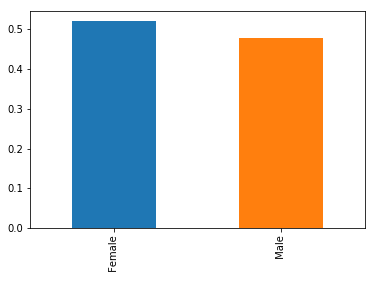

In [6]:
sex_counts = data["sex"].value_counts(normalize=True)
print(sex_counts)
plt = sex_counts.plot.bar()

The dataset is mainly composed of white males and females.

## Age repartition

count    199523.000000
mean         34.494199
std          22.310895
min           0.000000
25%          15.000000
50%          33.000000
75%          50.000000
max          90.000000
Name: age, dtype: float64


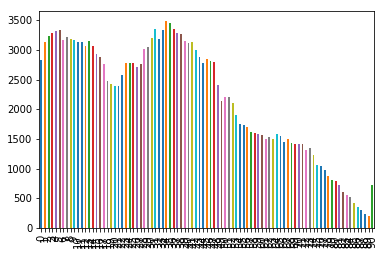

In [7]:
age_counts = data.set_index(["age"]).index.value_counts()
age = data['age']
print(age.describe())
plt = age_counts.sort_index().plot.bar()

count    12382.000000
mean        46.266193
std         11.830906
min         16.000000
25%         38.000000
50%         45.000000
75%         53.000000
max         90.000000
Name: age, dtype: float64


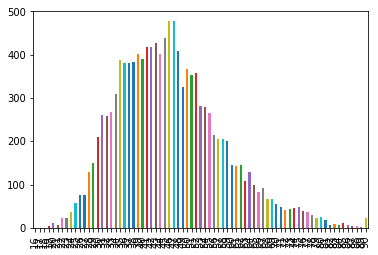

In [8]:
age_above = data.loc[data["income"]==above]["age"]
print(age_above.describe())
plt2 = age_above.value_counts().sort_index().plot.bar()

There is a lot of children and young people in the dataset. People earning more than 50k are mainly between 38 and 53 years old.

## Education

 10th grade                                 7557
 11th grade                                 6876
 12th grade no diploma                      2126
 1st 2nd 3rd or 4th grade                   1799
 5th or 6th grade                           3277
 7th and 8th grade                          8007
 9th grade                                  6230
 Associates degree-academic program         4363
 Associates degree-occup /vocational        5358
 Bachelors degree(BA AB BS)                19865
 Children                                  47422
 Doctorate degree(PhD EdD)                  1263
 High school graduate                      48407
 Less than 1st grade                         819
 Masters degree(MA MS MEng MEd MSW MBA)     6541
 Prof school degree (MD DDS DVM LLB JD)     1793
 Some college but no degree                27820
Name: education, dtype: int64


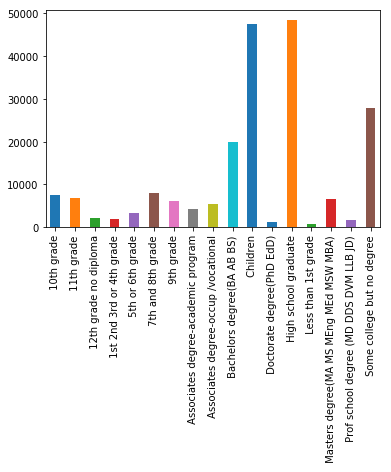

In [9]:
education = data["education"].value_counts().sort_index()
print(education)
plt = education.plot.bar()

People from the dataset are mainly undergrads (Children, High School graduates or no degree)

 10th grade                                0.991796
 11th grade                                0.989820
 12th grade no diploma                     0.984008
 1st 2nd 3rd or 4th grade                  0.992774
 5th or 6th grade                          0.993287
 7th and 8th grade                         0.991008
 9th grade                                 0.993900
 Associates degree-academic program        0.905570
 Associates degree-occup /vocational       0.922919
 Bachelors degree(BA AB BS)                0.802920
 Children                                  1.000000
 Doctorate degree(PhD EdD)                 0.479810
 High school graduate                      0.961183
 Less than 1st grade                       0.998779
 Masters degree(MA MS MEng MEd MSW MBA)    0.688427
 Prof school degree (MD DDS DVM LLB JD)    0.459565
 Some college but no degree                0.935766
Name: education, dtype: float64


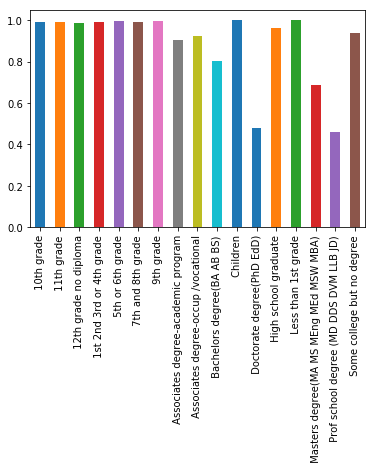

In [10]:
education_below = data.loc[data["income"]==below]["education"].value_counts().sort_index()
# Let's divide each education by the total number of people with that education
education_below = education_below.divide(education)
print(education_below)
plt = education_below.plot.bar()

We notice here that a lot of values are close to 1. This applies to people with undergrad education and means that almost all people from undergrad education earn less than 50k.

 10th grade                                0.008204
 11th grade                                0.010180
 12th grade no diploma                     0.015992
 1st 2nd 3rd or 4th grade                  0.007226
 5th or 6th grade                          0.006713
 7th and 8th grade                         0.008992
 9th grade                                 0.006100
 Associates degree-academic program        0.094430
 Associates degree-occup /vocational       0.077081
 Bachelors degree(BA AB BS)                0.197080
 Children                                       NaN
 Doctorate degree(PhD EdD)                 0.520190
 High school graduate                      0.038817
 Less than 1st grade                       0.001221
 Masters degree(MA MS MEng MEd MSW MBA)    0.311573
 Prof school degree (MD DDS DVM LLB JD)    0.540435
 Some college but no degree                0.064234
Name: education, dtype: float64


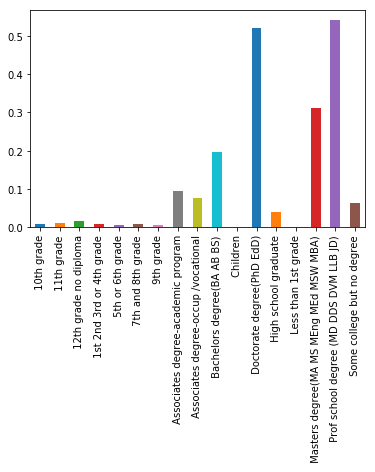

In [11]:
education_above = data.loc[data["income"]==above]["education"].value_counts().sort_index()
education_above = education_above.divide(education)
print(education_above)
plt = education_above.plot.bar()

Let's have a look at both graphs combined:

                                            above     below  count
 High school graduate                    0.038817  0.961183  48407
 Some college but no degree              0.064234  0.935766  27820
 10th grade                              0.008204  0.991796   7557
 Children                                     NaN  1.000000  47422
 Bachelors degree(BA AB BS)              0.197080  0.802920  19865
 Masters degree(MA MS MEng MEd MSW MBA)  0.311573  0.688427   6541
 Less than 1st grade                     0.001221  0.998779    819
 Associates degree-academic program      0.094430  0.905570   4363
 7th and 8th grade                       0.008992  0.991008   8007
 12th grade no diploma                   0.015992  0.984008   2126
 Associates degree-occup /vocational     0.077081  0.922919   5358
 Prof school degree (MD DDS DVM LLB JD)  0.540435  0.459565   1793
 5th or 6th grade                        0.006713  0.993287   3277
 11th grade                              0.010180  0.989820   

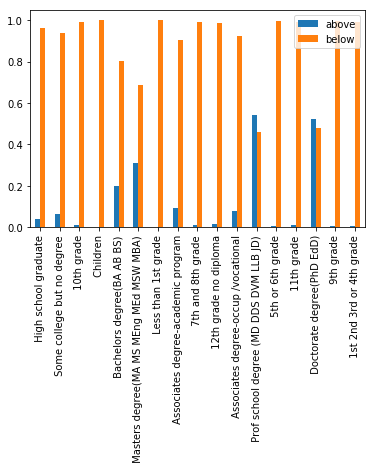

In [12]:
df = pd.DataFrame({'above': education_above, 'below': education_below}, index=data["education"].unique())
ax = df.plot.bar()
df['count']=education
print(df)

We see here that there is a correlation between education and income. People who have graduated are more likely to have an income over 50k. People who didn't graduate earn most of the time less than 50k.

## Class of worker

 Not in universe                   0.502423
 Private                           0.361001
 Self-employed-not incorporated    0.042326
 Local government                  0.039013
 State government                  0.021186
 Self-employed-incorporated        0.016364
 Federal government                0.014660
 Never worked                      0.002200
 Without pay                       0.000827
Name: class of worker, dtype: float64


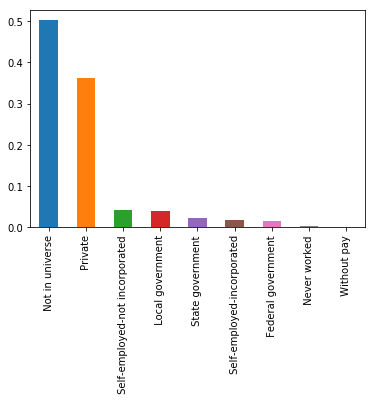

In [13]:
class_counts = data["class of worker"].value_counts(normalize=True)
print(class_counts)
plt = class_counts.plot.bar()

People from the dataset are mostly non-employed by the government. Half of the dataset is uncategorized here, so this variable doesn't have a lot of relevance for our use case.

## Industry / Occupation

 Not in universe or children            0.504624
 Retail trade                           0.085554
 Manufacturing-durable goods            0.045183
 Education                              0.041514
 Manufacturing-nondurable goods         0.034567
 Finance insurance and real estate      0.030798
 Construction                           0.029992
 Business and repair services           0.028323
 Medical except hospital                0.023471
 Public administration                  0.023105
 Other professional services            0.022464
 Transportation                         0.021095
 Hospital services                      0.019867
 Wholesale trade                        0.018023
 Agriculture                            0.015151
 Personal services except private HH    0.014720
 Social services                        0.012775
 Entertainment                          0.008275
 Communications                         0.005919
 Utilities and sanitary services        0.005904
 Private household s

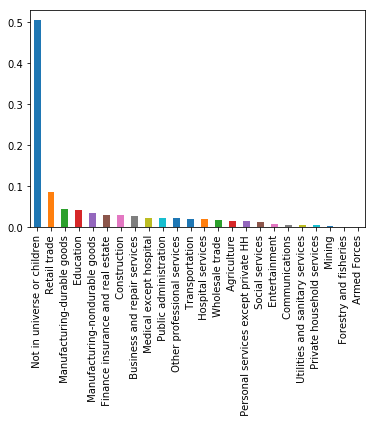

In [14]:
industry_counts = data["major industry code"].value_counts(normalize=True)
print(industry_counts)
plt = industry_counts.plot.bar()

 Not in universe                          0.504624
 Adm support including clerical           0.074362
 Professional specialty                   0.069867
 Executive admin and managerial           0.062624
 Other service                            0.060640
 Sales                                    0.059056
 Precision production craft & repair      0.052716
 Machine operators assmblrs & inspctrs    0.031971
 Handlers equip cleaners etc              0.020684
 Transportation and material moving       0.020148
 Farming forestry and fishing             0.015768
 Technicians and related support          0.015126
 Protective services                      0.008325
 Private household services               0.003909
 Armed Forces                             0.000180
Name: major occupation code, dtype: float64


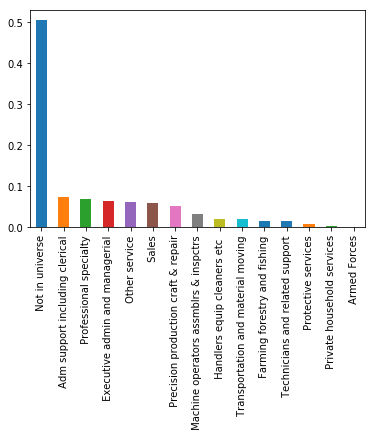

In [15]:
occupation_counts = data["major occupation code"].value_counts(normalize=True)
print(occupation_counts)
plt = occupation_counts.plot.bar()

We see here that there are a lot of children (It matches the Age variable).

## Full or part time employment stat

 Children or Armed Forces              123769
 Full-time schedules                    40736
 Not in labor force                     26808
 PT for non-econ reasons usually FT      3322
 Unemployed full-time                    2311
 PT for econ reasons usually PT          1209
 Unemployed part- time                    843
 PT for econ reasons usually FT           525
Name: full or part time employment stat, dtype: int64


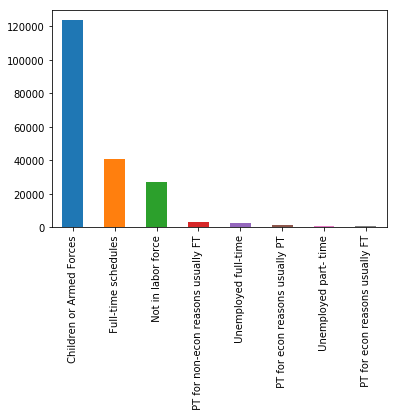

In [16]:
ft_counts = data["full or part time employment stat"].value_counts()
print(ft_counts)
plt = ft_counts.plot.bar()

We can divide people into three categories there: children/armed forces (62%), FT employees (20.4%), Not in labor force (13.4%)

 Children or Armed Forces              5874
 Full-time schedules                   5366
 Not in labor force                     462
 PT for non-econ reasons usually FT     393
 PT for econ reasons usually PT         155
 Unemployed full-time                    83
 PT for econ reasons usually FT          31
 Unemployed part- time                   18
Name: full or part time employment stat, dtype: int64


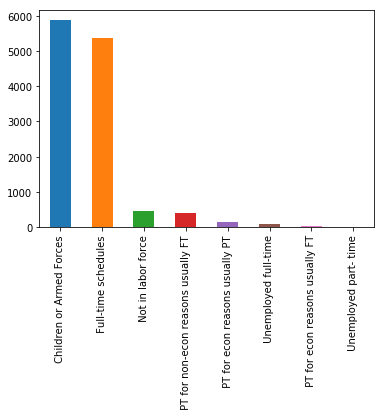

In [17]:
ft_counts = data[data["income"]==above]["full or part time employment stat"].value_counts()
print(ft_counts)
plt = ft_counts.plot.bar()

This is not what I expected, half of people earning more than 50k are Children/Armed Forces and the other half is working full time. This sounds weird as we studied the Age variable before and saw that people earning more than 50k are older than children, and that there is very few people working in the Armed Forces (Industry variable)

## Revenue

In [18]:
capital_counts = data["capital gains"].value_counts(normalize=True)
print(capital_counts.head())

0        0.963017
15024    0.003949
7688     0.003052
7298     0.002917
99999    0.001955
Name: capital gains, dtype: float64


In [19]:
capital_counts = data[data["income"]==" 50000+."]["capital gains"].value_counts(normalize=True)
print(capital_counts.head())

0        0.805201
15024    0.054353
7688     0.027944
99999    0.027782
7298     0.016072
Name: capital gains, dtype: float64


We see here that most of the people don't have capital gains (96,3%). However this is not true for people earning more that 50k a year (80,5%)

In [20]:
stocks_counts = data["dividends from stocks"].value_counts(normalize=True)
print(stocks_counts.head())

0       0.894042
100     0.005754
500     0.005162
1000    0.004481
200     0.004340
Name: dividends from stocks, dtype: float64


In [21]:
stocks_counts = data[data["income"]==" 50000+."]["dividends from stocks"].value_counts(normalize=True)
print(stocks_counts.head())

0       0.571071
1000    0.025602
500     0.024552
100     0.023421
200     0.017283
Name: dividends from stocks, dtype: float64


We can reach the same conclusion for stocks revenue. We see here that most of the people don't have stocks dividends but that this is not true for people earning more that 50k a year (only 57%)

In [22]:
wage_counts = data["wage per hour"].value_counts(normalize=True)
print(wage_counts.head())
wage_counts = data[data["income"]==" 50000+."]["wage per hour"].value_counts(normalize=True)
print(wage_counts.head())

0      0.943345
500    0.003679
600    0.002737
700    0.002676
800    0.002541
Name: wage per hour, dtype: float64
0       0.955096
2000    0.002100
1800    0.002019
2200    0.001615
2500    0.001534
Name: wage per hour, dtype: float64


Wage per hour attribute doesn't seem relevant here. Most of the time this value is at 0.

---
# Data preprocessing & Cleaning
Let's only keep the following columns for our models: age, sex, race, education, full or part time employment stat, major industry code, major occupation code, capital gains, dividends from stocks

In [23]:
clean_data = pd.DataFrame()
clean_test = pd.DataFrame()
clean_columns = ['age','sex','race','full or part time employment stat','major industry code','major occupation code','capital gains','dividends from stocks']
for col in clean_columns:
    clean_data[col]=data[col]
    clean_test[col]=test[col]
income_train = data['income']
income_test = test['income']
clean_data.head()


age      sex                        race full or part time employment stat  \
0   73   Female                       White                Not in labor force   
1   58     Male                       White          Children or Armed Forces   
2   18   Female   Asian or Pacific Islander                Not in labor force   
3    9   Female                       White          Children or Armed Forces   
4   10   Female                       White          Children or Armed Forces   

            major industry code                 major occupation code  \
0   Not in universe or children                       Not in universe   
1                  Construction   Precision production craft & repair   
2   Not in universe or children                       Not in universe   
3   Not in universe or children                       Not in universe   
4   Not in universe or children                       Not in universe   

   capital gains  dividends from stocks  
0              0                      0  
1              0                      0  
2              0                      0  
3              0                      0  
4              0                      0

Now, we convert our string data into integers values by using Dummy variables

In [24]:
data_train = pd.get_dummies(clean_data, columns = ['sex','race','full or part time employment stat','major industry code','major occupation code'])
data_test = pd.get_dummies(clean_test, columns = ['sex','race','full or part time employment stat','major industry code','major occupation code'])

data_train.columns

Index(['age', 'capital gains', 'dividends from stocks', 'sex_ Female',
       'sex_ Male', 'race_ Amer Indian Aleut or Eskimo',
       'race_ Asian or Pacific Islander', 'race_ Black', 'race_ Other',
       'race_ White',
       'full or part time employment stat_ Children or Armed Forces',
       'full or part time employment stat_ Full-time schedules',
       'full or part time employment stat_ Not in labor force',
       'full or part time employment stat_ PT for econ reasons usually FT',
       'full or part time employment stat_ PT for econ reasons usually PT',
       'full or part time employment stat_ PT for non-econ reasons usually FT',
       'full or part time employment stat_ Unemployed full-time',
       'full or part time employment stat_ Unemployed part- time',
       'major industry code_ Agriculture', 'major industry code_ Armed Forces',
       'major industry code_ Business and repair services',
       'major industry code_ Communications',
       'major industry code_

---
# Logistic regression

In [25]:
classifier = LogisticRegression(random_state=0)
classifier.fit(data_train,income_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
income_predicted = classifier.predict(data_test)
confusion_matrix_lr = confusion_matrix(income_test, income_predicted)
print(confusion_matrix_lr)

[[92882   694]
 [ 4691  1495]]


Our prediction is right on 92882+1495=94377 cases and wrong in 694+4691=5385 cases.

In [27]:
print(classifier.score(data_test, income_test))

0.9460215312443616


We have an average precision of 94,6%. The classifier is very good for detecting people under 50k but quite bad at detecting people over 50k (4691 people were misclassified). 

Let's have a look at other metrics:

In [28]:
print(classification_report(income_test, income_predicted))

             precision    recall  f1-score   support

   - 50000.       0.95      0.99      0.97     93576
    50000+.       0.68      0.24      0.36      6186

avg / total       0.94      0.95      0.93     99762



If confirms what we said before: the model is very good at classifying -50000 (95% precision and 99% recall) but struggles with 50000+ (24% recall).

# Decision Tree

In [29]:
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(data_train,income_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [30]:
income_predicted_dt = dt.predict(data_test)
confusion_matrix_dt = confusion_matrix(income_test, income_predicted_dt)
print(confusion_matrix_dt)

[[91989  1587]
 [ 3941  2245]]


The model makes a good prediction for 91989+2245=94234 cases and is wrong for 1587+3941=5528 cases. We can see there that it perfoms better on predictions for incomes of 50000+ (3941 of that category were misclassified vs 4691 for the regression).

In [31]:
print(dt.score(data_test, income_test))

0.9445881197249454


In [32]:
print(classification_report(income_test, income_predicted_dt))

             precision    recall  f1-score   support

   - 50000.       0.96      0.98      0.97     93576
    50000+.       0.59      0.36      0.45      6186

avg / total       0.94      0.94      0.94     99762



Here we can see that the decision tree performs better than the Logistic Regression.
It classifies well for -50000 (96% precision and 98% recall) and better than the Logistic Regression for the 50000+ (36% recall).

We can visualize the Decision Tree graph:

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.171642 to fit



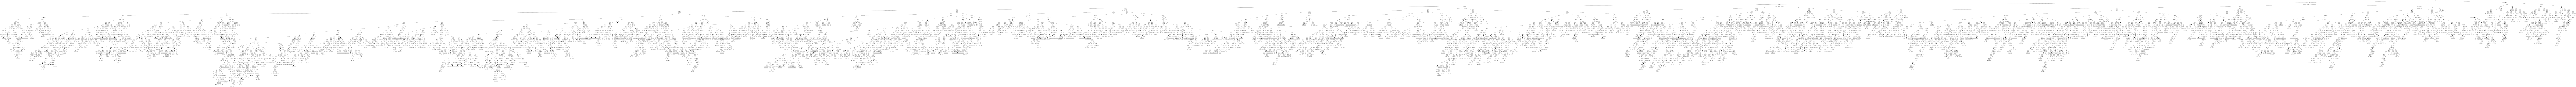

In [33]:
from IPython.display import Image 
import pydotplus
dt_graphviz = export_graphviz(dt, out_file = None)
pydot_graph = pydotplus.graph_from_dot_data(dt_graphviz)
Image(pydot_graph.create_png())

---
# Conclusion

The dataset is composed of a majority of white male and females, most of them being children or young adults. 93.7% of them earn less than 50k a year.
We can detect a correlation between the education and the income. People earning more than 50k are also more likely to have dividends from stocks or capital gains.

We generated two models (Logistic Regression and Decision Tree), keeping only several attributes that correlated with the income. Both of them perform very well to classify people earning less than 50k (due to the big amount of data of people earning less than 50k) but they struggle to classify people earning more than 50k, their recall for that class is 24% (Logistic Regression) and 36% (Decision Tree). For that reason, I would pick the Decision Tree model.

#### Possible improvements
Some possible improvements are:
 - study possible correlations with other variables
 - analyze influence of each parameter on current models to see their relevance